# Bilar

In [1]:
import os
import glob

import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
from helpers import *

# Data prep

Input CSV filerna har headers som sträcker sig över flera rader. Läser här in en av dem för att konkatenera dem till en lista. När filerna läses in skippas kolumnerna och ersätts med den här listan.

In [3]:
col_df = pd.read_csv('../indata/supermappen/Tabell17AHH_Bilbas2016.csv', encoding='latin1' , sep=';', decimal=',', header=None, nrows=4)
catcols = [col_df[col_df.columns[column]].str.strip().str.cat() for column in col_df.columns ]
catcols.append('year')
print(len(catcols))
print(catcols)

14
['Basområde', 'Antalpersoner', 'Antal personer med bil', 'Därav leasing', 'Antal bilar i trafik', 'Därav leasing', 'Antal avställda bilar', 'Därav leasing', 'Antal personersom skattatför förmånsbil', 'Antal personersom skattatmen ej skattatför förmånsbil', 'Antalhushåll', 'Antalhushållmed bil', 'Antal hushållmed fler änen bil', 'year']


In [4]:
files = glob.glob('../indata/supermappen/*Bilbas*.csv')

In [5]:
files

['../indata/supermappen/Tabell17AHH_Bilbas2016.csv',
 '../indata/supermappen/Tabell17AHH_Bilbas2015.csv',
 '../indata/supermappen/Tabell17AHH_Bilbas2017.csv']

In [6]:
def readBil(file):
    df = pd.read_csv(file, encoding='latin1' , sep=';', decimal=',', header=None, skiprows=4)
    df['year'] = pd.to_datetime(getYear(file))
    df['year'] = df['year'].apply(lambda t: t.year)
    df.columns = catcols
    df = df.rename(columns={'Basområde': 'BASKOD2010'})

    
    return df

Läs in alla filer och slå ihop till en DataFrame

In [7]:
df = pd.concat(list(map(readBil, files)))

In [8]:
df = baskod2010tobasomrade(df).drop(columns=['BASKOD2010', 'BASKOD2000'])

Plocka ut relevanta kolumner

In [9]:
df = df[['basomrade', 'year', 'Antalpersoner', 'Antal personer med bil', 'Antal bilar i trafik', 'Antal avställda bilar', 'Antalhushåll', 'Antalhushållmed bil', 'Antal hushållmed fler änen bil']]

In [10]:
df.head()

,basomrade,year,Antalpersoner,Antal personer med bil,Antal bilar i trafik,Antal avställda bilar,Antalhushåll,Antalhushållmed bil,Antal hushållmed fler änen bil
1,1010120_skeppsbron,2016,491,86,84,23,252.0,78.0,17.0
2,1010130_munkbron,2016,1197,176,163,46,588.0,170.0,24.0
3,1010140_stortorget,2016,1537,276,261,67,851.0,244.0,34.0
4,1010201_centralstationen_n,2016,243,52,47,12,145.0,45.0,5.0
7,1010220_klara_kyrka,2016,139,30,27,7,79.0,31.0,3.0


In [11]:
df[df.year == 2017].describe()

,year,Antalpersoner,Antal personer med bil,Antal bilar i trafik,Antal avställda bilar,Antalhushåll,Antalhushållmed bil,Antal hushållmed fler änen bil
count,1136.0,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,2017.0,1960.288732,491.529930,527.789613,94.683979,855.288732,435.748239,108.608275
std,0.0,1651.504874,368.465425,397.060038,84.364667,780.161201,329.857839,98.598973
min,2017.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.0,768.000000,219.000000,235.000000,37.000000,314.000000,188.750000,38.750000
50%,2017.0,1523.500000,404.000000,430.000000,71.000000,630.500000,357.500000,80.000000
75%,2017.0,2613.250000,687.750000,741.500000,130.000000,1131.000000,605.000000,146.000000
max,2017.0,9684.000000,2556.000000,3028.000000,703.000000,5026.000000,2208.000000,860.000000


# Antal bilar

In [12]:
concept = 'cars_total'

In [13]:
subset = df
subset['value'] = subset['Antal bilar i trafik'] + subset['Antal avställda bilar']
subset = subset[['value', 'year', 'basomrade']]

In [14]:
output = appendNewDatapoints(concept, subset, new=True)

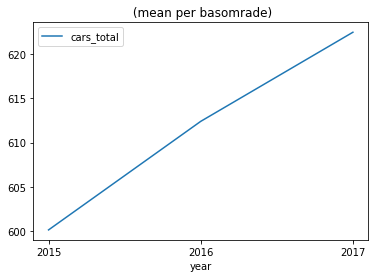

In [15]:
plotcombined(output, concept)

# Antal hushåll med bil

In [16]:
concept = 'cars_household_w_cars_total'

In [17]:
column = 'Antalhushållmed bil'
subset = df[[column, 'year', 'basomrade']]
subset = subset.rename(columns={
    column: 'value'
})

In [18]:
output = appendNewDatapoints(concept, subset, new=True)

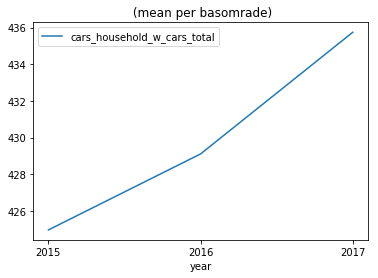

In [19]:
plotcombined(output, concept)

# Andel hushåll med bil

In [20]:
concept = 'cars_household_w_cars_share'

In [21]:
subset = df
subset['value'] = subset['Antalhushållmed bil'] / subset['Antalhushåll']
subset['value'] = subset['value'].round(3)

subset = subset[['value', 'year', 'basomrade']]

In [22]:
output = appendNewDatapoints(concept, subset, new=True)

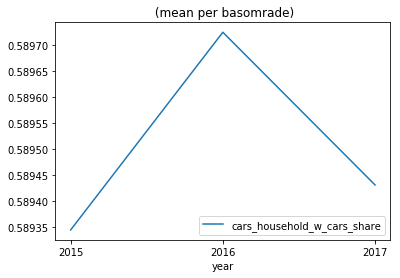

In [23]:
plotcombined(output, concept)

# Antal bilar per hushåll

In [33]:
concept = 'cars_per_household'

In [34]:
subset = df
subset['n_bilar'] = subset['Antal bilar i trafik'] + subset['Antal avställda bilar']
subset['value'] = subset['n_bilar'] / subset['Antalhushåll']
subset['value'] = subset['value'].round(2)

subset = subset[['value', 'year', 'basomrade']]

In [35]:
output = appendNewDatapoints(concept, subset, new=True)

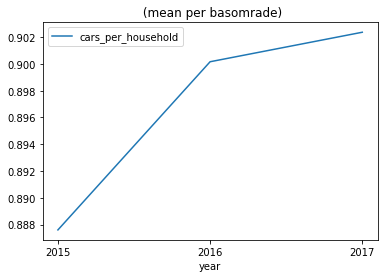

In [36]:
plotcombined(output, concept)